## 🔰 `Introduction` :

>**Sentiment analysis** refers to `identifying as well as classifying the sentiments` that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

>Therefore we need to develop an **Automated Machine Learning Sentiment Analysis Model** in order to `compute the customer perception`. Due to the presence of non-useful characters (collectively termed as the noise) along with useful data, it becomes difficult to implement models on them.

## 🎯  `Objective` :

>We aim to analyze the sentiment of the tweets provided from the `Sentiment140 dataset` by developing a **`Machine Learning model`** involving the use of three classifiers:
> - **`Logistic Regression - LR`**.
> - **`Bernoulli Naive Bayes - BNB`**.
> - **`Support Vector Machine - SVM`**.  <br>                                                           
Along with using **`Term Frequency- Inverse Document Frequency (TF-IDF)`**. 

>The **performance** of these classifiers is then **evaluated** using **accuracy**, **ROC-AUC Curve** and **F1 Scores**.

### 1️⃣ `Importing the necessary dependencies` :

> Here in this part, we import all the necessary libraries that we will use in our project. The choice of libraries depends on the approach we will follow.

In [2]:
# utilities : 
import re # regular expression library
import numpy as np
import pandas as pd
import os

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# time library :
import time

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chowd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chowd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2️⃣ `Reading and Loading the Dataset` :

> In any project related to the manipulation and analysis of data, we always start by collecting the data on which we are going to work. In our case, we will import our data from a `.csv` file.

The various columns present in the dataset are:
- `target`: the polarity of the tweet (positive or negative)
- `ids`: Unique id of the tweet
- `date`: the date of the tweet
- `flag`: It refers to the query. If no such query exists then it is NO QUERY.
- `user`: It refers to the name of the user that tweeted
- `text`: It refers to the text of the tweet

In [3]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r"C:\Users\chowd\Downloads\archive\training.1600000.processed.noemoticon.csv", 
                 encoding=DATASET_ENCODING, 
                 names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
471936,0,2176729551,Mon Jun 15 04:36:54 PDT 2009,NO_QUERY,eikiji,@REDTAIL200 I'm still not entirely sure I can ...
1007036,4,1880665632,Fri May 22 02:03:23 PDT 2009,NO_QUERY,juzferyou,?????? See you guys again!
987905,4,1834709331,Mon May 18 03:56:31 PDT 2009,NO_QUERY,amy_runner,@PatrickAvis yeah seeing them next Wed too
1037255,4,1956494896,Thu May 28 22:00:14 PDT 2009,NO_QUERY,VanessaSummers,@MrTweet_Alert I Recomend @JairekRobbins and ...
919373,4,1753806179,Sun May 10 03:32:57 PDT 2009,NO_QUERY,achitnis,@priyaflorence I'll say Even I don't do Domin...


### 3️⃣ `Exploratory Data Analysis` :
> In this part, the objective is to know the imported data as much as possible, we analyze a sample, we look for the shape of the dataset, the column names, the data type information, we check if there are null values, in short, we process our data and above all we target the data (columns) that interests us.

In [4]:
# Display of the first 5 lines of our dataset :
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
# Display the number of records is our dataset :
print('length of data is', len(df))

length of data is 1600000


In [7]:
df.shape

(1600000, 6)

- **1600000** is the number of records in our dataset.
- **6** is the number of columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


The range index of the records starts from **0** to **1599999**

In [9]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

- The data type of some columns in our dataset is `object`, which means we still have to process our data before getting into machine learning stuff.

In [10]:
# Checking for Null values :
np.sum(df.isnull().any(axis=1))

0

- Good news so far, there are no missing values in our dataset.

In [11]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [12]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4], dtype=int64)

In [13]:
df['target'].nunique()

2

The **`target`** column is composed of just **0** and **4**
 - **0** stands for `negative` sentiment.
 - **4** stands for `positive` sentiment.

### 4️⃣  `Data Visualization of Target Variables` :
> After processing our data and targeting the columns we are interested in, the next step is to have a visual on our data with mathematical plots, the reason for using plots is that a plots makes the data speak more, so it become more understandable.

In [14]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


- Since the **`target`** column only contains **0** or **4**, using the **`.groupby()`** function will result in two categories: **0** and **4**

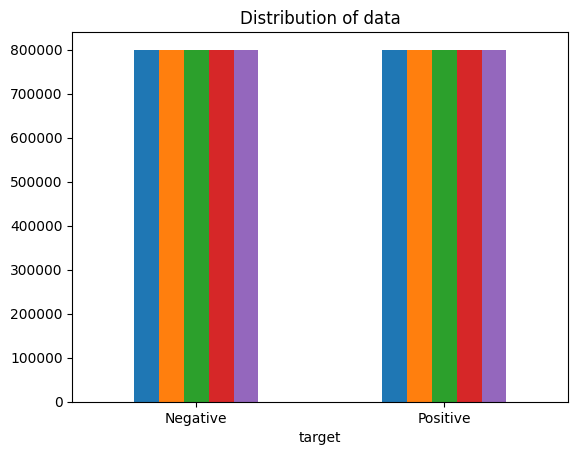

In [15]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

- Each color represents one of the columns : **`ids`**, **`date`**, **`flag`**, **`user`**	and **`text`**.
- **`text`** variable contains the **`text`** column.
- **`sentiment`** variable contains the **`target`** column.

C:\Users\chowd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chowd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chowd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='target', ylabel='count'>

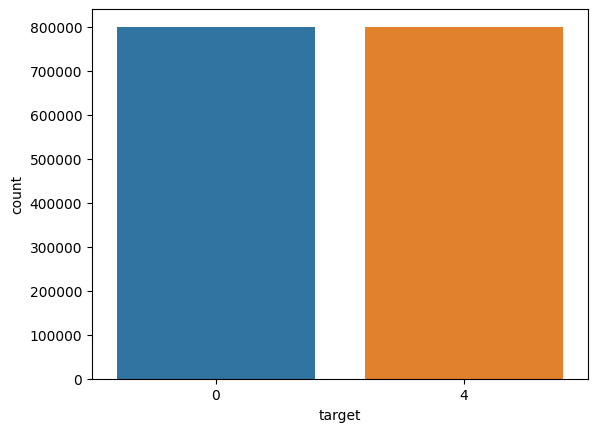

In [16]:
import seaborn as sns
sns.countplot(x='target', data=df)

- We did the same as before, we just used the **`.countplot()`** function from **`seaborn`**.

### 5️⃣  `Data Preprocessing ` :
> Before training the model, we will perform various pre-processing steps on the dataset such as: 
>- Removing stop words.
>- Removing emojis. 
>- Converting the text document to lowercase for better generalization.
>- Cleaning the ponctuation (to reduce unnecessary noise from the dataset).
>- Removing the repeating characters from the words along with removing the URLs as they do not have any significant importance. <br>                          
and much more, we will see this in detail later...

> We will then performe 
>- **`Stemming`** : reducing the words to their derived stems.
>- **`Lemmatization`** : reducing the derived words to their root form known as lemma for better results.

In [17]:
# Selecting the text and Target column for our further analysis :
data = df[['text','target']]

- **`data`** variable contains the **`target`** and **`text`** columns.

In [18]:
# Replacing the values to ease understanding :
data['target'] = data['target'].replace(4,1)

C:\Users\chowd\AppData\Local\Temp\ipykernel_13348\2579391872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [19]:
# Print unique values of target variable :
data['target'].unique()

array([0, 1], dtype=int64)

The **`target`** column is composed of just **0** and **1**
 - **0** stands for **`negative`** sentiment.
 - **1** stands for **`positive`** sentiment.

In [21]:
# Separating positive and negative tweets :
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

 - The **`data_pos`** variable contains the **`text`** and the **`target = 1`** columns. 
 - The **`data_neg`** variable contains the **`text`** and the **`target = 0`** columns. 

In [22]:
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

- The **`dataset`** variable is a pandas dataframe **(1600000 rows x 2 columns)** that contains the **`text`** and the **`target`** columns. 
- The **800000** first rows are the positive tweets.
- The **800000** second rows are the negative tweets.

In [23]:
# Quick view of how our data looks:
dataset['text'].tail()

799995    Sick  Spending my day laying in bed listening ...
799996                                      Gmail is down? 
799997                        rest in peace Farrah! So sad 
799998    @Eric_Urbane Sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [24]:
# Making statement text in lower case :
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

- **`text`** column is made up of only lowercase characters.

In [25]:
# Defining set containing all stopwords in English :
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']


In [26]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

- **`text`** column has been cleaned of stop words.

In [27]:
#  Cleaning and removing punctuations :
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

- **`text`** column has been cleaned of punctuation.

In [28]:
# Cleaning and removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

- **`text`** column has been cleaned of repetitive characters.

In [29]:
# Cleaning and removing URL’s :
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

- **`text`** column has now been cleaned of URLs.

In [30]:
# Cleaning and removing Numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylorswif
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

- Column **`text`** has now been cleaned of numeric numbers.

In [32]:
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

- Column **`text`** has now been tokenized.

In [33]:
# Applying Stemming :
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

- **Stemming** has now been applied to the **`text`** column.

In [34]:
# Applying Lemmatizer :
lm = nltk.WordNetLemmatizer()


def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

- **Lemmatizer** has now been applied to the **`text`** column.

In [35]:
# Separating input feature and label :
X = data.text
y = data.target

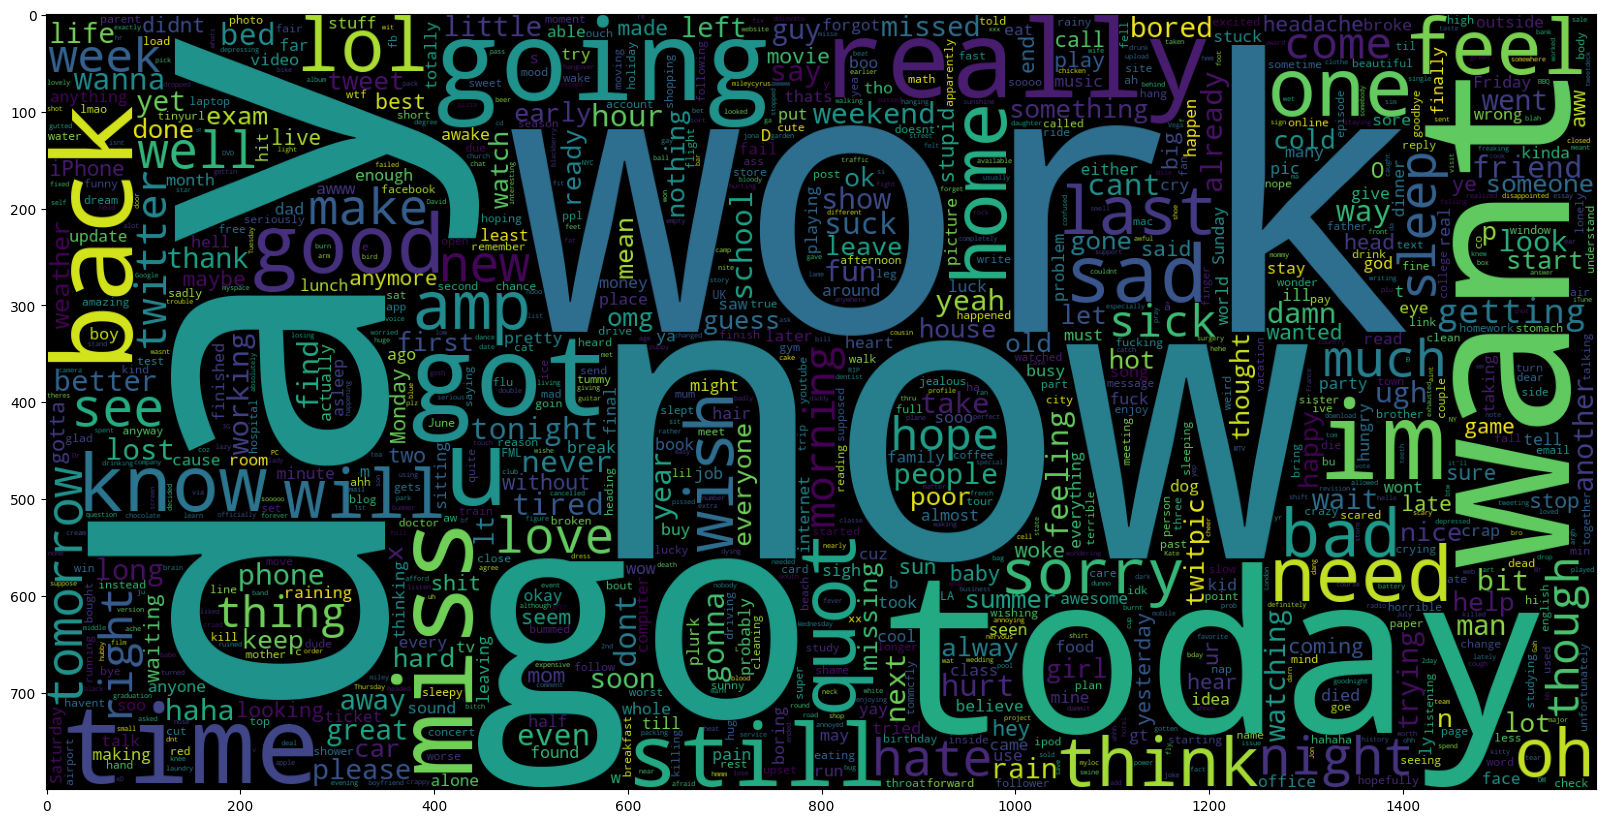

In [36]:
# Plot a cloud of words for negative tweets :
data_neg = data['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

- As the picture shows, a lot of negative words appear: bad, sad, wrong..

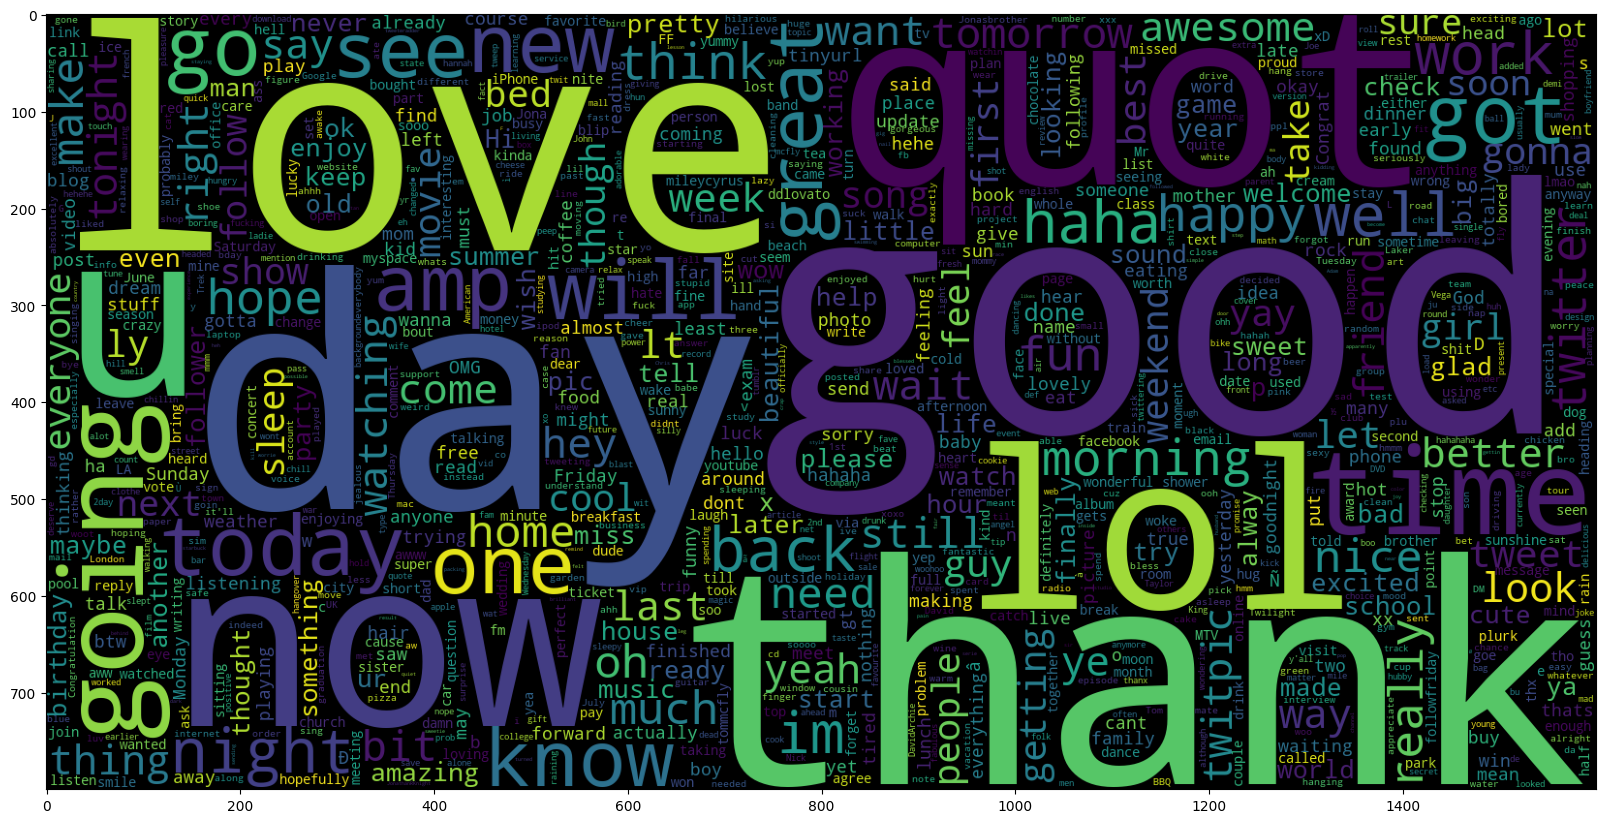

In [37]:
# Plot a cloud of words for positive tweets :
data_pos = data['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

- As the picture shows, a lot of negative words appear: good, love, happy..

### 6️⃣  `Splitting our data into Train and Test Subset ` :

In [38]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

- **`random_state`** is basically used for reproducing your problem the same every time it is run. If we do not use a **random_state** in **train_test_split**, every time you make the split we might get a different set of train and test data points and will not help in debugging in case we get an issue.

- **`X`** contains **`data.text`**
- **`y`** contains = **`data.target`**


- **`X_train`** contains **95%** of **`data.text`**
- **`X_test`** contains **5%** of **`data.text`**


- **`y_train`** contains **95%** of **`data.target`**
- **`y_test`** contains **5%** of **`data.target`**

###  7️⃣ `Transforming Dataset using TF-IDF Vectorizer` :
> Scikit-learn's **`Tfidftransformer`** and **`Tfidfvectorizer`** aim to do the same thing, which is to convert a collection of raw documents to a matrix of **TF-IDF features**.

In [39]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [40]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test

<80000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 1563076 stored elements in Compressed Sparse Row format>

###  8️⃣ `Function for Model Evaluation` :
> After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :
> - **`Accuracy Score`** : Typically, the accuracy of a predictive model is good (above 90% accuracy)
> - **`ROC-AUC Curve`** : The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
> - **`Confusion Matrix with Plot`** : A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
    * **`Actual values`** are the columns.
    * **`Predicted values`** are the lines.
><table>
    <tbody>
        <tr>
            <td></td>
            <td><b>Positive</b></td>
            <td><b>Negative</b></td>
        </tr>
        <tr>
            <td><b>Positive</b></td>
            <td>TP</td>
            <td>TN</td>
        </tr>
        <tr>
            <td><b>Negative</b></td>
            <td>FP</td>
            <td>TN</td>
        </tr>
    </tbody>
</table> 


In [41]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

- To avoid each time and for each model, drawing the confusion matrix, printing the precision, the f1-score... we just define the **`model Evaluate()`** function which will do the job each time.

###  9️⃣ `Model Building` :
> In the problem statement we have used three different models respectively :
>- **`Bernoulli Naive Bayes`**.
>- **`SVM (Support Vector Machine)`**.
>- **`Logistic Regression`**.

>The idea behind choosing these models is that **we want to try all the classifiers on the dataset** ranging from simple models to complex models, and try to **find the one that performs the best**.

The execution time of this model is 1.01 seconds

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



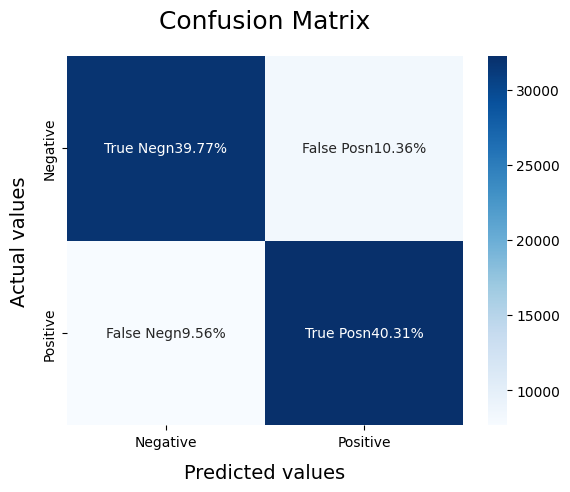

In [42]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

- The **`class 0`** is the class of **negative tweets**.
- The **`class 1`** is the class of **positive tweets**.

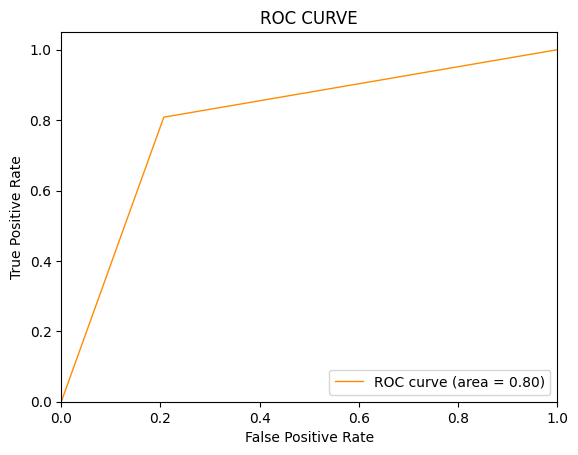

In [43]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

C:\Users\chowd\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The execution time of this model is 30.67 seconds

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



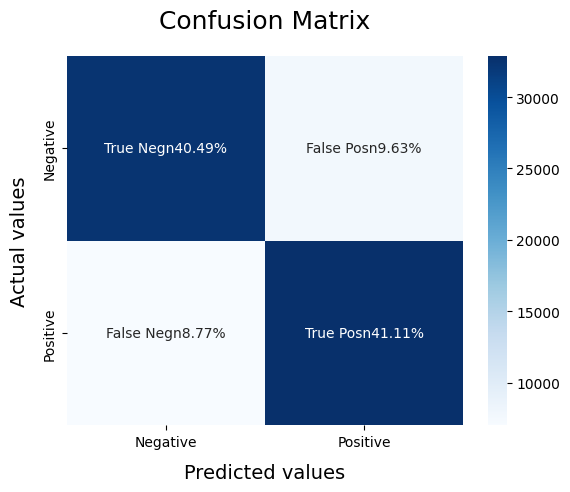

In [44]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

- The **`class 0`** is the class of **negative tweets**.
- The **`class 1`** is the class of **positive tweets**.

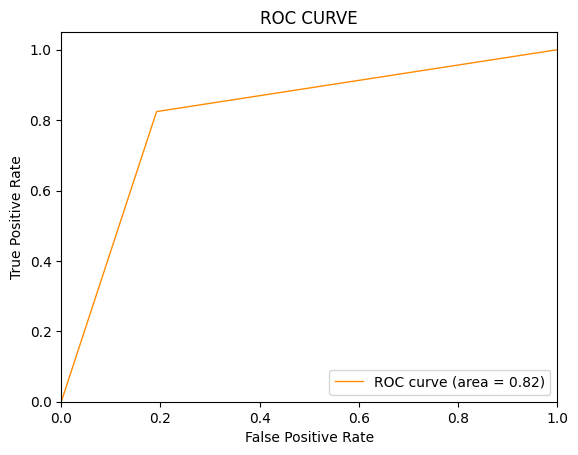

In [45]:
# Plot the ROC-AUC Curve for model-2 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 138.79 seconds

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



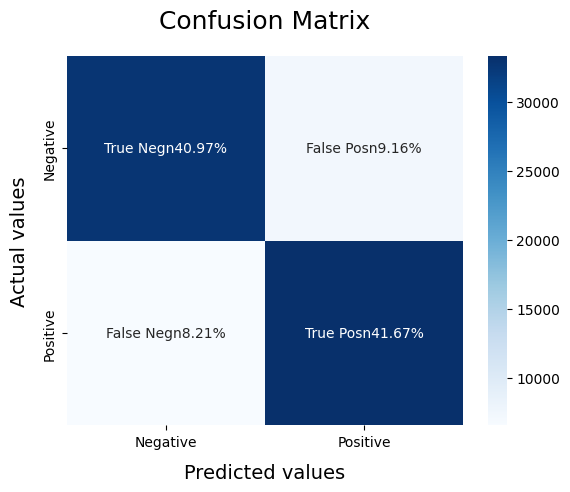

In [46]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

- The **`class 0`** is the class of **negative tweets**.
- The **`class 1`** is the class of **positive tweets**.

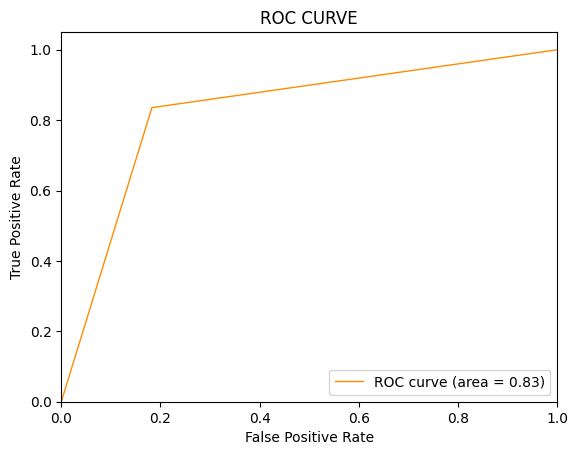

In [47]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###  1️⃣0️⃣ `Conclusion` :
> After evaluating all models, we can conclude the following details :
><table>
    <thead>
        <tr>
            <th><b>Model</b></th>
            <th><b>Accuracy</b></th>
            <th><b>F1-score ( class 0 )</b></th>
            <th><b>F1-score ( class 1 )</b></th>
            <th><b>AUC Score</b></th>
            <th><b>Execution time</b></th>
        </tr>
        </thead>
    <tbody>
        <tr>
            <td><b>Bernoulli Naive Bayes (BNB)</b></td>
            <td>80%</td> 
            <td>80%</td>
            <td>80%</td>
            <td>80%</td>
            <td>0.69 seconds</td>
        </tr>
        <tr>
            <td><b>Support Vector Machine (SVM)</b></td>
            <td>82%</td> 
            <td>81%</td>
            <td>82%</td>
            <td>82%</td>
            <td>28.32 seconds</td>
        </tr>
        <tr>
            <td><b>Logistic Regression (LR)</b></td>
            <td>83%</td> 
            <td>83%</td>
            <td>83%</td>
            <td>83%</td>
            <td>163.56 seconds</td>
        </tr>
    </tbody>
</table>


 - **`Execution time`** : When it comes to comparing the running time of models, `Bernoulli Naive Bayes` performs faster than `SVM`, which in turn runs faster than `Logistic Regression`.
 - **`Accuracy`** : When it comes to model accuracy, `logistic regression` performs better than `SVM`, which in turn performs better than `Bernoulli Naive Bayes`.
 - **`F1-score`** : The F1 Scores for **class 0** and **class 1** are :
> - For **class 0** (negative tweets) : 
>```
accuracy : BNB (= 0.80) < SVM (=0.81) < LR (= 0.83) 
>``` 
> - For **class 1** (positive tweets) : 
>```
accuracy : BNB (= 0.80) < SVM (=0.82) < LR (= 0.83) 
>```
 - **`AUC Score`** : All three models have the same ROC-AUC score.
>```
AUC score : BNB (= 0.80) < SVM (=0.82) < LR (= 0.83) 
>``` 

- We therefore conclude that **`logistic regression`** is the **best model** for the above dataset.(although it took much longer to run than other models).                           


- In our problem statement, **`logistic regression`** follows **`Occam's razor principle`** which defines that for a particular problem statement, if the data has no assumptions, then the simplest model works best. Since our **dataset has no assumptions** and **logistic regression is a simple model**, so the concept holds true for the dataset mentioned above.